# Expansión Ortogonal

In [12]:
import sympy as sp
from sympy.abc import x

In [13]:
x = sp.symbols('x')
# Definir las funciones
f1 = 1
f2 = x
f3 = x**2
f4 = x**3
f5 = x**4

# Funciones Auxiliares

In [36]:
def producto_interno(funcion1, funcion2, w=1/((1-x**2)**0.5)):
    return sp.integrate(funcion1 * funcion2 *w , (x, -1, 1))

def norma_funcional(funcion1):
    return sp.sqrt(producto_interno(funcion1,funcion1))

In [37]:
def gram_schmidt(funciones):
    ortonormales = []
    R = []
    for k in range(len(funciones)):
        # L2: y = a_k
        y = funciones[k]
        r_k = []
        # L3: bucle
        for i in range(k):
            # L4: producto punto entre <q_i , y>
            rik = producto_interno(ortonormales[i], y)
            r_k.append(rik)
            # L5: se resta la proyeccion
            y = y - rik * ortonormales[i]
        
        # L6: Normalización
        rk_k = norma_funcional(y)
        qk = y / rk_k
        
        ortonormales.append(qk)
        r_k.append(rk_k)
        R.append(r_k)
    return ortonormales, R



funciones = [f1, f2, f3, f4, f5]
funciones_ortonormales, R = gram_schmidt(funciones)

print(R)

for i, f in enumerate(funciones_ortonormales):
    print(f"q{i+1}(x) = {f}")

_CoeffExpValueError: expr not of form a*x**b: 0.564189583547756

# TODO: Gráficar

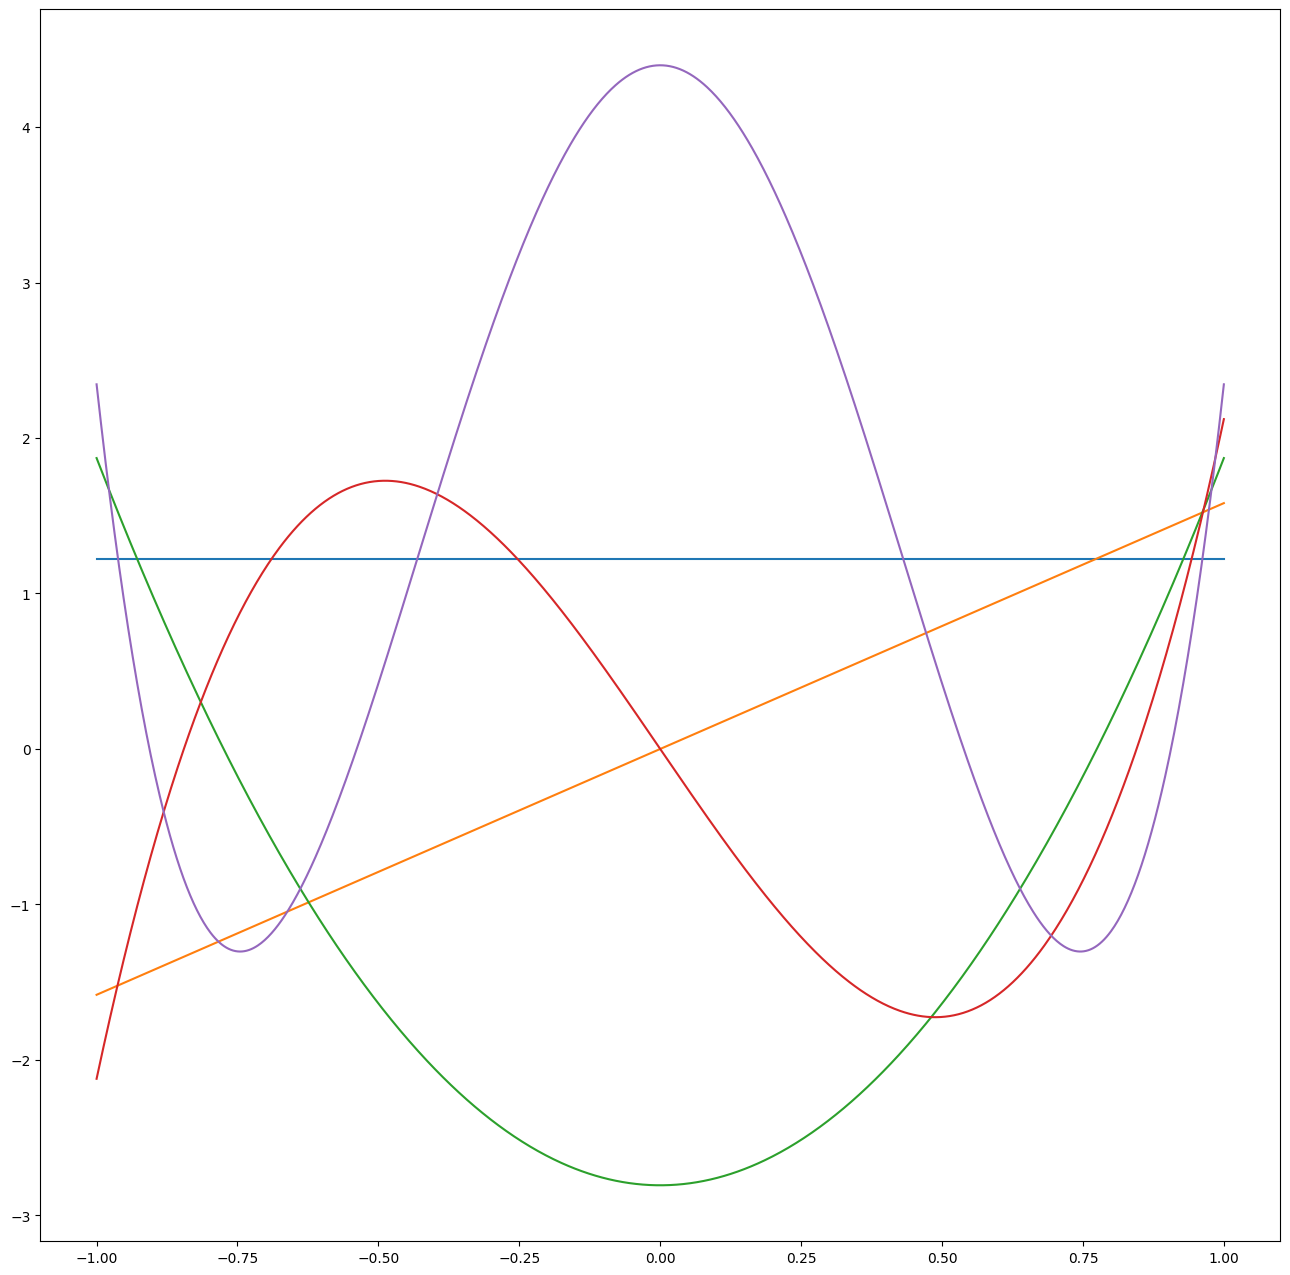

In [33]:
import matplotlib.pyplot as plt
import numpy as np

n = 1000
puntos = np.linspace(-1,1,n)


plt.figure(figsize=(16,16))
for i, f in enumerate(funciones_ortonormales):
    f_vec = np.vectorize(sp.lambdify(x, f))
    plt.plot(puntos,f_vec(puntos),"-")




In [11]:
help(sp.lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(
    args,
    expr,
    modules=None,
    printer=None,
    use_imps=True,
    dummify=False,
    cse=False,
    docstring_limit=1000
)
    Convert a SymPy expression into a function that allows for fast
    numeric evaluation.

    .. warning::
       This function uses ``exec``, and thus should not be used on
       unsanitized input.

    .. deprecated:: 1.7
       Passing a set for the *args* parameter is deprecated as sets are
       unordered. Use an ordered iterable such as a list or tuple.

    Explanation

    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:

    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.